**QS World Ranking website scrapping**

In [195]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import yaml
import requests
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import colorsys


In [196]:
url = "https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508196855735"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Success


In [197]:
results_page = BeautifulSoup(response.content.decode("utf-8", errors='ignore'),'html.parser')

#print(results_page.prettify())
data_string=str(results_page)
#result_page.find_all('li',class_='ingredient'):
#data_string=data_string.replace('\\',"\"")



In [198]:
import re

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext
l=cleanhtml(str(data_string))
m=json.dumps(l)
n=json.loads(m )

#json_acceptable_string = n.replace("'", "\"")
#r = json.loads(json_acceptable_string)
n

'{"data":[{"nid":"294850","url":"\\/universities\\/massachusetts-institute-technology-mit","title":"Massachusetts Institute of Technology (MIT)","logo":"\\u003Cimg src=\\u0022https:\\/\\/www.topuniversities.com\\/sites\\/default\\/files\\/massachusetts-institute-of-technology-mit_410_small_0.jpg\\u0022 alt=\\u0022Massachusetts Institute of Technology (MIT)  Logo\\u0022\\u003E","core_id":"410","score":"100","rank_display":"1","country":"United States","cc":"US","region":"North America","stars":"6","guide":"\\u003Ca href=\\u0022\\/where-to-study\\/north-america\\/united-states\\/guide\\u0022 class=\\u0022guide-link\\u0022 target=\\u0022_blank\\u0022\\u003EUnited States\\u003C\\/a\\u003E"},{"nid":"297282","url":"\\/universities\\/stanford-university","title":"Stanford University","logo":"\\u003Cimg src=\\u0022https:\\/\\/www.topuniversities.com\\/sites\\/default\\/files\\/stanford-university_573_small_0.jpg\\u0022 alt=\\u0022Stanford University Logo\\u0022\\u003E","core_id":"573","score":

In [208]:
def extractNumber(div):
    return div.find('div',class_="number").text.strip()
k=json.loads(n)
df = pd.DataFrame.from_dict(json_normalize(k["data"][:]), orient='columns')
df=df.drop(['guide','logo','core_id','nid','cc','stars'],axis=1)
df=pd.concat([df,pd.DataFrame(columns=['totalStaff','internationalStaff','totalStudents','internationalStudents'])])
df=df.head(200)
baseurl='https://www.topuniversities.com'
#testcounter=0
for index,path in enumerate(df['url']):
    
    
    #Retrieve html
    response = requests.get(baseurl+path)
    if response.status_code == 200:
        #Create a html parser
        soup=BeautifulSoup(response.content,'html.parser')
        try:
            #find the class total faculty in which we can extract the usefull number.
            mydivs = soup.find_all("div", { "class" : "total faculty" })
            df['totalStaff'].iloc[index]=extractNumber(mydivs[0])
        except IndexError:
            print('missing total staff:  '+str(baseurl+path))
        
        
        
        try:
            mydivs = soup.find_all("div", { "class" : "inter faculty" })
            df['internationalStaff'].iloc[index]=extractNumber(mydivs[0])
        except IndexError:
            print('missing international staff '+str(baseurl+path))

        try:
            mydivs=soup.find_all("div", { "class" : "students-main wrapper col-md-4" })
            df['totalStudents'].iloc[index]=extractNumber(mydivs[0])
        except IndexError:
            print('missing total students:   '+str(baseurl+path))



        try:
            mydivs=soup.find_all("div", { "class" : "int-students-main wrapper col-md-4" })
            df['internationalStudents'].iloc[index]=extractNumber(mydivs[0])
        except IndexError:
            print('missing international students: '+str(baseurl+path))
        
            

        
    else:
        print("Failure")
   

missing total staff:  https://www.topuniversities.com/universities/new-york-university-nyu
missing international staff https://www.topuniversities.com/universities/new-york-university-nyu
missing total students:   https://www.topuniversities.com/universities/new-york-university-nyu
missing international students: https://www.topuniversities.com/universities/new-york-university-nyu
missing international staff https://www.topuniversities.com/universities/indian-institute-science-iisc-bangalore


In [209]:
#filter out kommas
dfreserve=df.copy()

In [214]:
df=dfreserve.copy()
df

,country,internationalStaff,internationalStudents,rank_display,region,score,title,totalStaff,totalStudents,url
0,United States,"1,679","3,717",1,North America,100,Massachusetts Institute of Technology (MIT),"2,982","11,067",/universities/massachusetts-institute-technolo...
1,United States,"2,042","3,611",2,North America,98.7,Stanford University,"4,285","15,878",/universities/stanford-university
2,United States,"1,311","5,266",3,North America,98.4,Harvard University,"4,350","22,429",/universities/harvard-university
3,United States,350,647,4,North America,97.7,California Institute of Technology (Caltech),953,"2,255",/universities/california-institute-technology-...
4,United Kingdom,"2,278","6,699",5,Europe,95.6,University of Cambridge,"5,490","18,770",/universities/university-cambridge
5,United Kingdom,"2,964","7,353",6,Europe,95.3,University of Oxford,"6,750","19,720",/universities/university-oxford
6,United Kingdom,"2,554","14,854",7,Europe,94.6,UCL (University College London),"6,345","31,080",/universities/ucl-university-college-london
7,United Kingdom,"2,071","8,746",8,Europe,93.7,Imperial College London,"3,930","16,090",/universities/imperial-college-london
8,United States,635,"3,379",9,North America,93.5,University of Chicago,"2,449","13,557",/universities/university-chicago
9,Switzerland,"1,886","7,563",10,Europe,93.3,ETH Zurich - Swiss Federal Institute of Techno...,"2,477","19,815",/universities/eth-zurich-swiss-federal-institu...


In [215]:
col_list=['internationalStaff','internationalStudents','totalStaff','totalStudents']
df[col_list]=df[col_list].apply(lambda x: x.str.replace(',',''))
df[col_list]=df[col_list].astype(float)


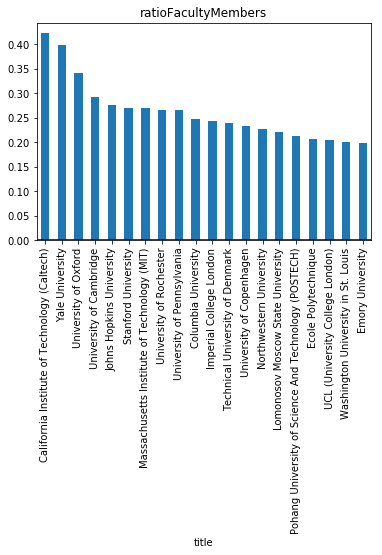

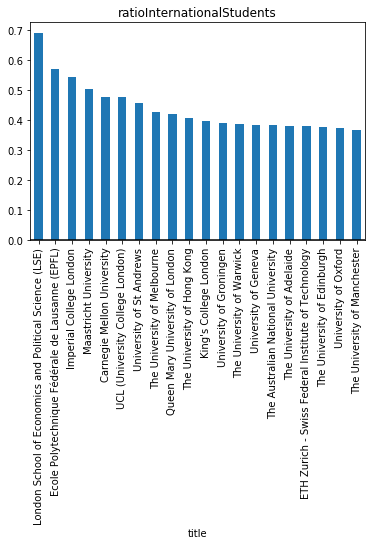

In [216]:
#Getting ratio between faculty members
plt.close()
plt.figure()
df['ratioFacultyMembers']=np.array(df['totalStaff'])/np.array(df['totalStudents'])
dfSortedFacultyMembers=df.sort_values('ratioFacultyMembers',ascending=False).head(20)
s = pd.Series(dfSortedFacultyMembers['ratioFacultyMembers'].values, index=dfSortedFacultyMembers['title'])
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratioFacultyMembers')
plt.show()



#Getting ratio between international studnets
df['ratioInternationalStudents']=np.array(df.internationalStudents)/np.array(df.totalStudents)
dfSortedInternationalStudents=df.sort_values('ratioInternationalStudents',ascending=False).head(20)
s = pd.Series(dfSortedInternationalStudents['ratioInternationalStudents'].values, index=dfSortedInternationalStudents['title'])
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratioInternationalStudents')
plt.show()




In [217]:
#Aggregating by country
countryDict={}
for country,groupDff in df.groupby('country'):
    groupDf=groupDff.dropna(axis=0,how='any')
    staff=np.sum(np.array(groupDf['totalStaff']))/np.sum(np.array(groupDf['totalStudents']))
    international=np.sum(np.array(groupDf['internationalStudents']))/np.sum(np.array(groupDf['totalStudents']))
    countryDict[country]=[staff,international]



200


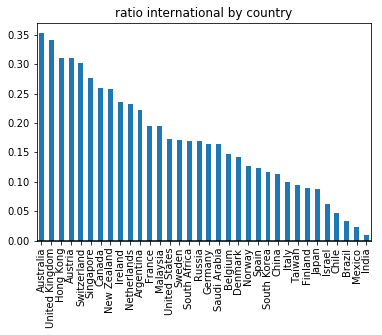

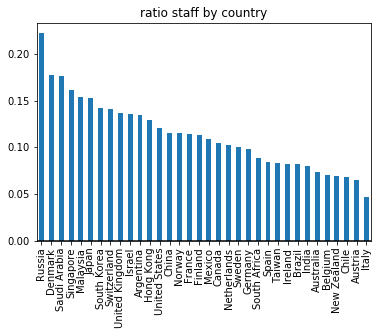

In [247]:
#plotting it in the same way as before
t=np.array(list(countryDict.values()))[:,1]
s=pd.Series(t,list(countryDict.keys()))
s=s.sort_values(ascending=False)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio international by country')
plt.show()


t=np.array(list(countryDict.values()))[:,0]
s=pd.Series(t,list(countryDict.keys()))
s=s.sort_values(ascending=False)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio staff by country')
plt.show()





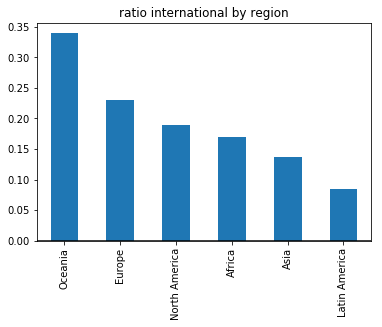

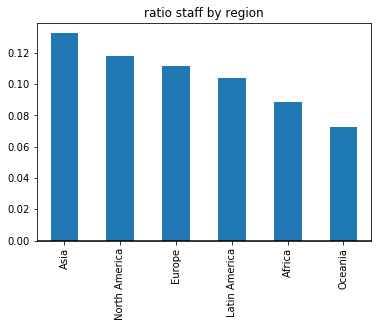

In [249]:
#Aggregating by country
regionDict={}
for region,groupDff in df.groupby('region'):
    groupDf=groupDff.dropna(axis=0,how='any')
    staff=np.sum(np.array(groupDf['totalStaff']))/np.sum(np.array(groupDf['totalStudents']))
    international=np.sum(np.array(groupDf['internationalStudents']))/np.sum(np.array(groupDf['totalStudents']))
    regionDict[region]=[staff,international]

#plotting it in the same way as before
t=np.array(list(regionDict.values()))[:,1]
s=pd.Series(t,list(regionDict.keys()))
s=s.sort_values(ascending=False)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio international by region')
plt.show()


t=np.array(list(regionDict.values()))[:,0]
s=pd.Series(t,list(regionDict.keys()))
s=s.sort_values(ascending=False)
s.plot(kind='bar');
plt.axhline(0, color='k')
plt.title('ratio staff by region')
plt.show()


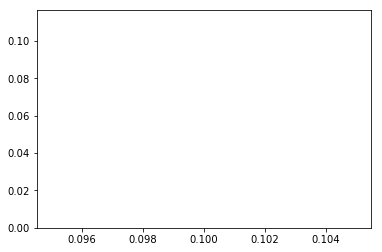

In [180]:
#Within country best university for faculty members and international students
countryUniversityDict={}
for country,groupDf in df.groupby('country'):
    countryDf=groupDf.copy()
    countryDf['ratioFacultyMembers']=np.array(countryDf['totalStaff'])/np.array(countryDf['totalStudents'])
    countryDf['ratioInternationalStudents']=np.array(countryDf['internationalStudents'])/np.array(countryDf['totalStudents'])
    countryUniversityDict[country]=countryDf 

pos = list(range(len(countryDf)))
plt.close()
plt.figure()
for country,countryDf in countryUniversityDict.items():
    pos = list(range(len(countryDf)))
    N = len(countryDf)
    HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
    RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)
    i=0
    """
    for index, uniRow in countryDf.iterrows():
        
        plt.bar(pos, 
            uniRow['ratioFacultyMembers'], 
            # of width
            width=0.25, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='red', label=uniRow['title'])
        a=np.array(pos).astype(float)+0.25
        #pos=np.array(pos).astype(float)+0.25
        i+=1
        
    """
    colors=['red','blue','yellow','green','orange','purple','black']
    maxnb=10
    pltRange=[0.1,0.2 ,.3 ,0.4 ,0.5, 0.6, 0.7, 0.8, 0.9]
    i=0
    for index,unirow in countryDf.iterrows():
        plt.bar(pltRange[i], 
            uniRow['ratioFacultyMembers'], 
            # of width
            width=0, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color=colors[i], label=uniRow['title'])
        #pos=np.array(pos).astype(float)+0.2
    i+=1
    break

plt.show()

In [171]:
pos
a=np.array(pos).astype(float)+0.25




In [ ]:
newdf=pd.Dataframe()
for index,row in df.iterrows():
    if !row['rank'].equals('Thing that you want'):
        newdf.append(row)
    else:
        break
        
        
    

**Times Higer education website scrapping**

In [6]:
url = "https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")


Success


In [7]:
s = json.dumps(response.content.decode('utf8'))

l=json.dumps(json.JSONDecoder().decode(s))
l=l.replace('\\"',"\"")

l=l.strip('"')



In [8]:
import yaml
k=json.loads(l)
df = pd.DataFrame.from_dict(json_normalize(k["data"][:]), orient='columns')
df

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,...,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url
0,University of Oxford,United Kingdom,0,University of Oxford,468,1,10,master_account,99.1,15,...,99.5,1,86.7,5,46 : 54,"20,409",38%,11.2,"Archaeology,Art, Performing Arts \u0026 Design...",\/world-university-rankings\/university-oxford
1,University of Cambridge,United Kingdom,0,University of Cambridge,470,2,20,master_account,97.5,29,...,97.8,3,87.8,3,45 : 55,"18,389",35%,10.9,"Archaeology,Architecture,Art, Performing Arts ...",\/world-university-rankings\/university-cambridge
2,California Institute of Technology caltech,United States,0,California Institute of Technology,128779,=3,30,private,99.5,10,...,97.5,4,90.3,1,31 : 69,"2,209",27%,6.5,"Architecture,Biological Sciences,Business \u00...",\/world-university-rankings\/california-instit...
3,Stanford University,United States,11,Stanford University,467,=3,40,private,99.9,4,...,96.7,5,89.1,2,42 : 58,"15,845",22%,7.5,"Archaeology,Architecture,Art, Performing Arts ...",\/world-university-rankings\/stanford-university
4,Massachusetts Institute of Technology,United States,0,Massachusetts Institute of Technology,471,5,50,private,100.0,1,...,91.9,9,87.3,4,37 : 63,"11,177",34%,8.7,"Architecture,Art, Performing Arts \u0026 Desig...",\/world-university-rankings\/massachusetts-ins...
5,Harvard University,United States,0,Harvard University,466,6,60,private,99.7,8,...,98.4,2,84.2,9,None,"20,326",26%,8.9,"Agriculture \u0026 Forestry,Archaeology,Art, P...",\/world-university-rankings\/harvard-university
6,Princeton University,United States,0,Princeton University,469,7,70,private,99.6,9,...,93.9,6,85.7,7,45 : 55,"7,955",24%,8.3,"Architecture,Art, Performing Arts \u0026 Desig...",\/world-university-rankings\/princeton-university
7,Imperial College London,United Kingdom,0,Imperial College London,472,8,80,master_account,96.7,40,...,88.7,12,81.7,13,37 : 63,"15,857",55%,11.4,"Biological Sciences,Chemical Engineering,Chemi...",\/world-university-rankings\/imperial-college-...
8,University of Chicago,United States,0,University of Chicago,473,9,90,private,99.4,12,...,90.1,10,85.3,8,44 : 56,"13,525",25%,6.2,"Archaeology,Art, Performing Arts \u0026 Design...",\/world-university-rankings\/university-chicago
9,ETH Zurich \u2013 Swiss Federal Institute of T...,Switzerland,0,ETH Zurich \u2013 Swiss Federal Institute of T...,479,=10,100,master_account,94.3,60,...,92.0,8,76.4,21,31 : 69,"19,233",38%,14.6,"Agriculture \u0026 Forestry,Architecture,Biolo...",\/world-university-rankings\/eth-zurich-swiss-...


In [9]:
response

<Response [200]>